<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-393 Aprendizaje Automático II-2020 </h1>
    <h3> Taller 2 </h3>
</center>

Nombres: Nicolás Rosas Gómez  & Camilo Núñez Fernández

Roles: 201573608-1 & 201573573-5

Correos:
nicolas.rosasg@sansano.usm.cl & camilo.nunezf@sansano.usm.cl
<hr style="height:2px;border:none"/>

**Temas**  

* Selección de Características
* Reducción de Dimensionalidad
* Vecinos Más Cercanos (KNN) 
* Árboles de Clasificación
* SVMs (Máquinas de Vectores de Soporte)

<hr style="height:2px;border:none"/>

# Pregunta de Investigación

## Pregunta seleccionada:
**SVM Multi-class :** Emplear OVO para extender una SVM a problemas con múltiples clases produce mejores resultados que emplear OVA o ECOC.

In [1]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.datasets import make_classification, fetch_olivetti_faces, fetch_covtype
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import os

try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    os.system('pip install -U imbalanced-learn')
    from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from seaborn import  heatmap

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

def plot_confusion_matrix(y_test, y_pred, figsize=(10,7)):
    conf_matrix = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_matrix)
    plt.figure(figsize =figsize)
    heatmap(df_cm, annot=True)
    plt.show()

## Desarrollo


### Datos sinteticos

In [3]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, n_redundant=5, n_classes=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
%%time
clf_ovr = OneVsRestClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
clf_ovo = OneVsOneClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
clf_ecoc = OutputCodeClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)

CPU times: user 57.1 ms, sys: 83.9 ms, total: 141 ms
Wall time: 2.99 s


In [5]:
%%time
y_pred_ovr = clf_ovr.predict(X_test)
y_pred_ovo = clf_ovo.predict(X_test)
y_pred_ecoc = clf_ecoc.predict(X_test)

CPU times: user 2.66 s, sys: 275 µs, total: 2.66 s
Wall time: 2.65 s


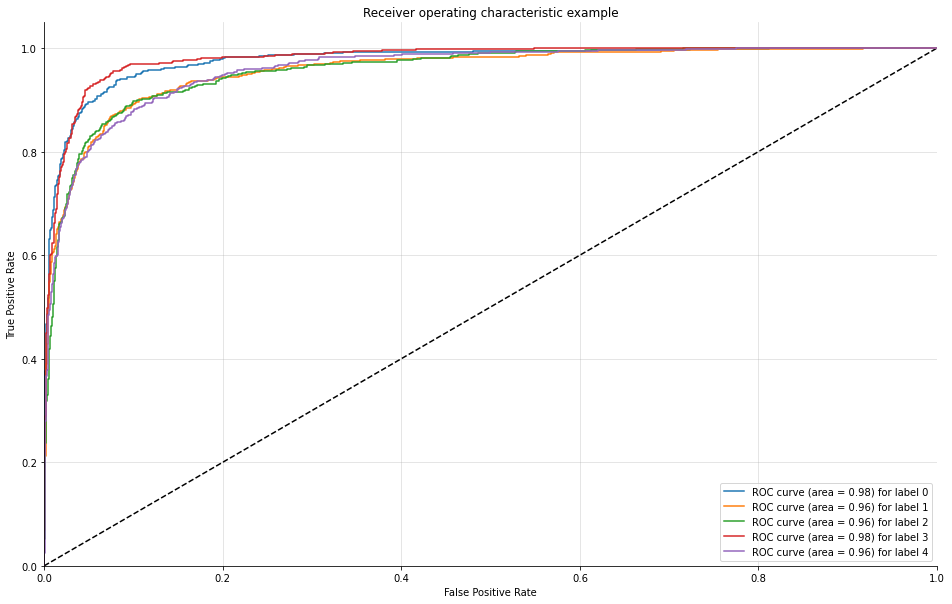

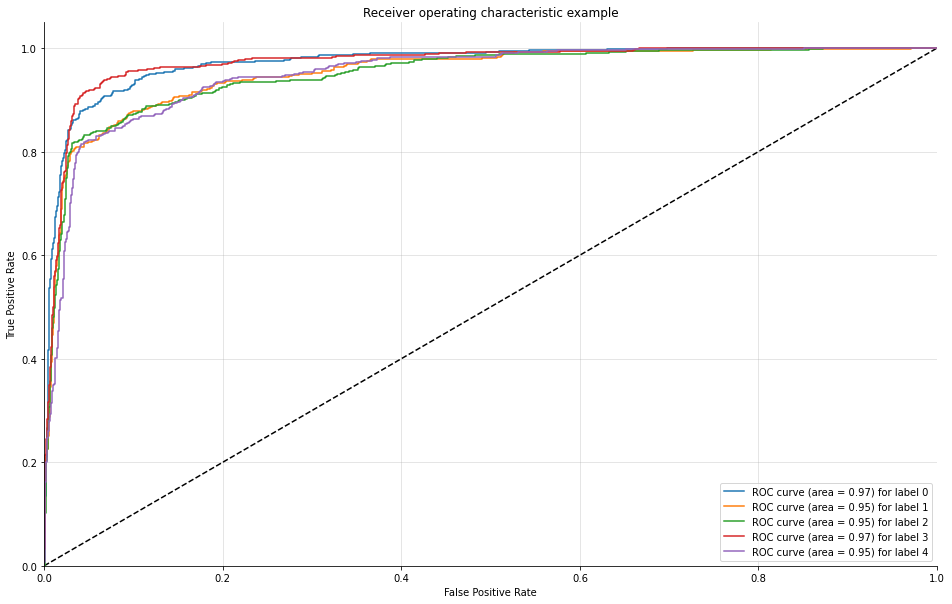

In [6]:
plot_multiclass_roc(clf_ovr, X_test, y_test, n_classes=5, figsize=(16, 10))
plot_multiclass_roc(clf_ovo, X_test, y_test, n_classes=5, figsize=(16, 10))

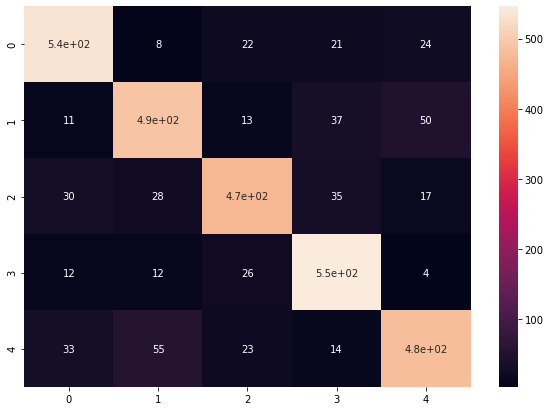

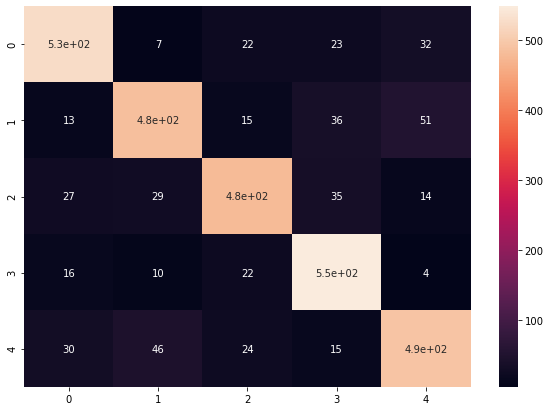

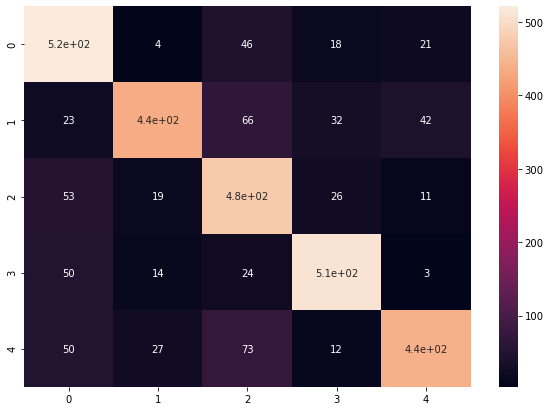

In [7]:
plot_confusion_matrix(y_test, y_pred_ovr)
plot_confusion_matrix(y_test, y_pred_ovo)
plot_confusion_matrix(y_test, y_pred_ecoc)

In [8]:
print(classification_report(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ecoc))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       610
           1       0.83      0.81      0.82       600
           2       0.85      0.81      0.83       584
           3       0.84      0.91      0.87       600
           4       0.84      0.79      0.81       606

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       610
           1       0.84      0.81      0.82       600
           2       0.85      0.82      0.84       584
           3       0.83      0.91      0.87       600
           4       0.83      0.81      0.82       606

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

              precisio

In [9]:
print(mean_absolute_error(y_test, y_pred_ovr))
print(mean_absolute_error(y_test, y_pred_ovo))
print(mean_absolute_error(y_test, y_pred_ecoc))

0.35433333333333333
0.354
0.44333333333333336


In [10]:
print(mean_squared_error(y_test, y_pred_ovr))
print(mean_squared_error(y_test, y_pred_ovo))
print(mean_squared_error(y_test, y_pred_ecoc))

0.9523333333333334
0.9626666666666667
1.154


### Datos reales: fetch olivetti faces



In [11]:
base = fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(base.data, base.target, test_size=0.3, random_state=42)

In [12]:
%%time
clf_ovr = OneVsRestClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
clf_ovo = OneVsOneClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
clf_ecoc = OutputCodeClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)

CPU times: user 1.01 s, sys: 501 ms, total: 1.51 s
Wall time: 5.85 s


In [13]:
%%time
y_pred_ovr = clf_ovr.predict(X_test)
y_pred_ovo = clf_ovo.predict(X_test)
y_pred_ecoc = clf_ecoc.predict(X_test)

CPU times: user 17.3 s, sys: 0 ns, total: 17.3 s
Wall time: 17.3 s


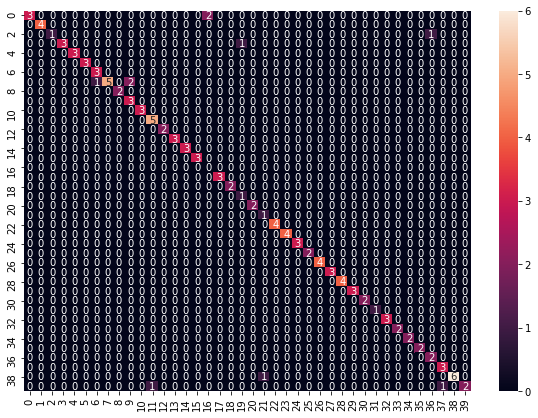

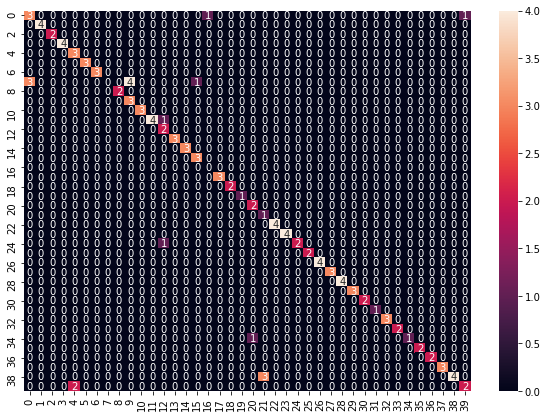

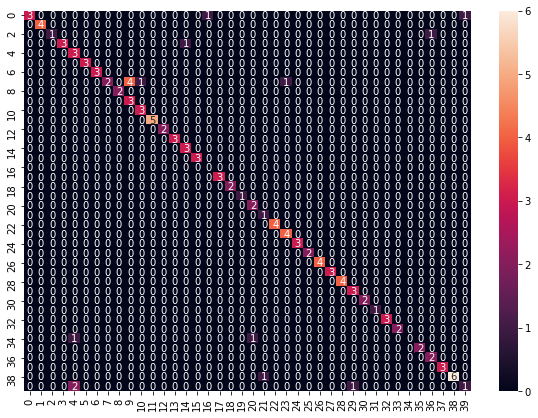

In [14]:
plot_confusion_matrix(y_test, y_pred_ovr)
plot_confusion_matrix(y_test, y_pred_ovo)
plot_confusion_matrix(y_test, y_pred_ecoc)

In [15]:
print(classification_report(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ecoc))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      0.62      0.77         8
           8       1.00      1.00      1.00         2
           9       0.60      1.00      0.75         3
          10       1.00      1.00      1.00         3
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         0
          17       1.00    

In [16]:
print(mean_absolute_error(y_test, y_pred_ovr))
print(mean_absolute_error(y_test, y_pred_ovo))
print(mean_absolute_error(y_test, y_pred_ecoc))

1.1166666666666667
2.0
2.2333333333333334


In [17]:
print(mean_squared_error(y_test, y_pred_ovr))
print(mean_squared_error(y_test, y_pred_ovo))
print(mean_squared_error(y_test, y_pred_ecoc))

25.083333333333332
47.18333333333333
60.583333333333336


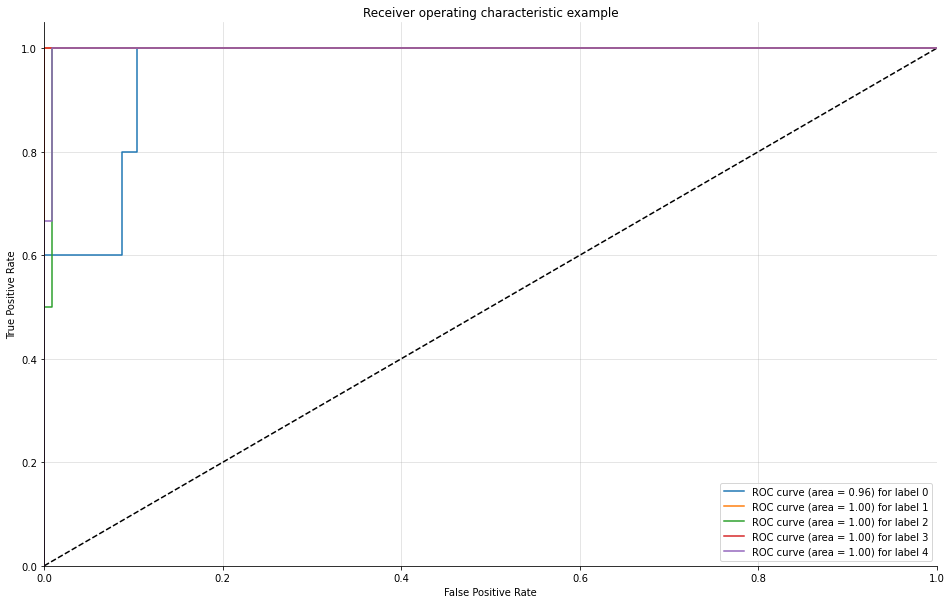

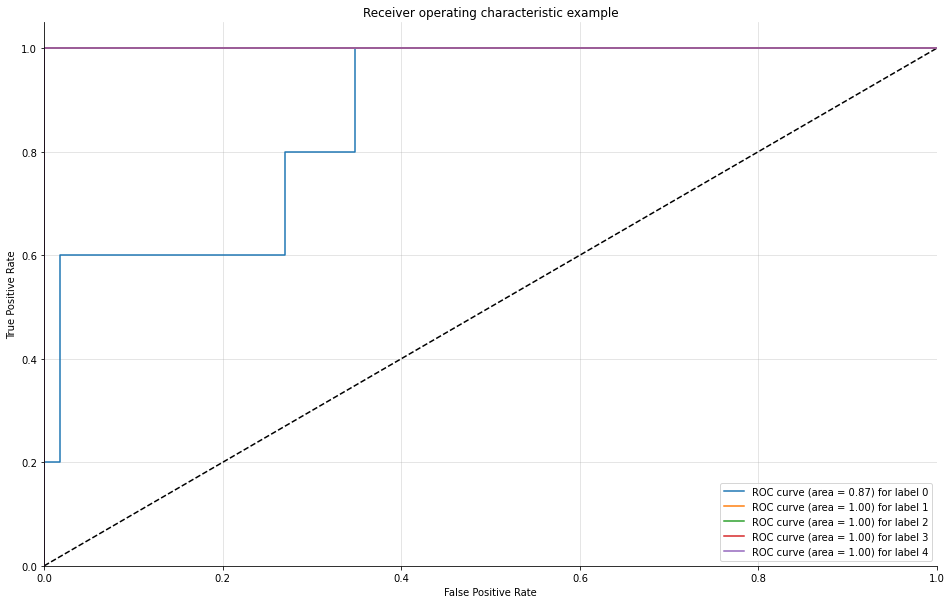

In [18]:
plot_multiclass_roc(clf_ovr, X_test, y_test, n_classes=5, figsize=(16, 10))
plot_multiclass_roc(clf_ovo, X_test, y_test, n_classes=5, figsize=(16, 10))

### Datos reales: fetch covtype

In [19]:
cov_data = fetch_covtype()
X = cov_data.data
y = cov_data.target 

In [20]:
#Resampling por desbalanceo en las clases
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [21]:
#se reduce el tamaño de los dataset utilizando el train/test split, para
#mejorar tiempos de procesamiento
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.01, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.40, random_state=42)

In [22]:
%%time
ovo_svc_clf = OneVsOneClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
ova_svc_clf = OneVsRestClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)
ecoc_svc_clf = OutputCodeClassifier(SVC(), n_jobs=-1).fit(X_train, y_train)

CPU times: user 65.2 ms, sys: 35.3 ms, total: 100 ms
Wall time: 15.1 s


In [23]:
%%time
y_pred_ovo = ovo_svc_clf.predict(X_test)
y_pred_ovr = ova_svc_clf.predict(X_test)
y_pred_ecoc = ecoc_svc_clf.predict(X_test)

CPU times: user 52 s, sys: 72.3 ms, total: 52.1 s
Wall time: 52 s


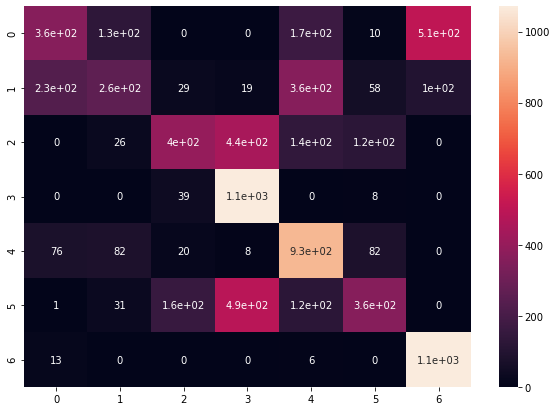

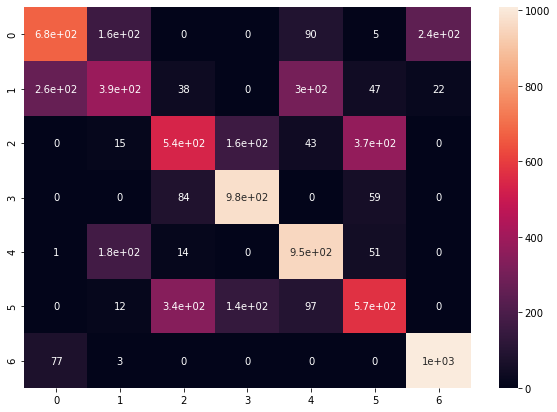

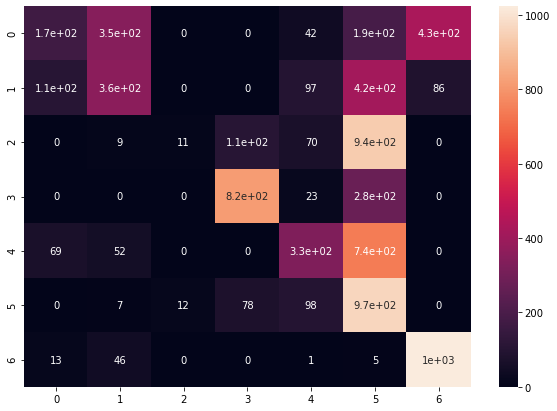

In [24]:
plot_confusion_matrix(y_test, y_pred_ovr)
plot_confusion_matrix(y_test, y_pred_ovo)
plot_confusion_matrix(y_test, y_pred_ecoc)

In [25]:
print(classification_report(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ecoc))

              precision    recall  f1-score   support

           1       0.53      0.31      0.39      1179
           2       0.49      0.25      0.33      1060
           3       0.62      0.35      0.45      1132
           4       0.53      0.96      0.68      1118
           5       0.54      0.78      0.63      1194
           6       0.56      0.31      0.40      1162
           7       0.64      0.98      0.77      1088

    accuracy                           0.56      7933
   macro avg       0.56      0.56      0.52      7933
weighted avg       0.56      0.56      0.52      7933

              precision    recall  f1-score   support

           1       0.66      0.57      0.61      1179
           2       0.51      0.37      0.43      1060
           3       0.53      0.48      0.50      1132
           4       0.76      0.87      0.81      1118
           5       0.64      0.80      0.71      1194
           6       0.52      0.49      0.51      1162
           7       0.79 

In [26]:
print(mean_absolute_error(y_test, y_pred_ovr))
print(mean_absolute_error(y_test, y_pred_ovo))
print(mean_absolute_error(y_test, y_pred_ecoc))

1.2176982226143955
0.9616790621454683
1.511281986638094


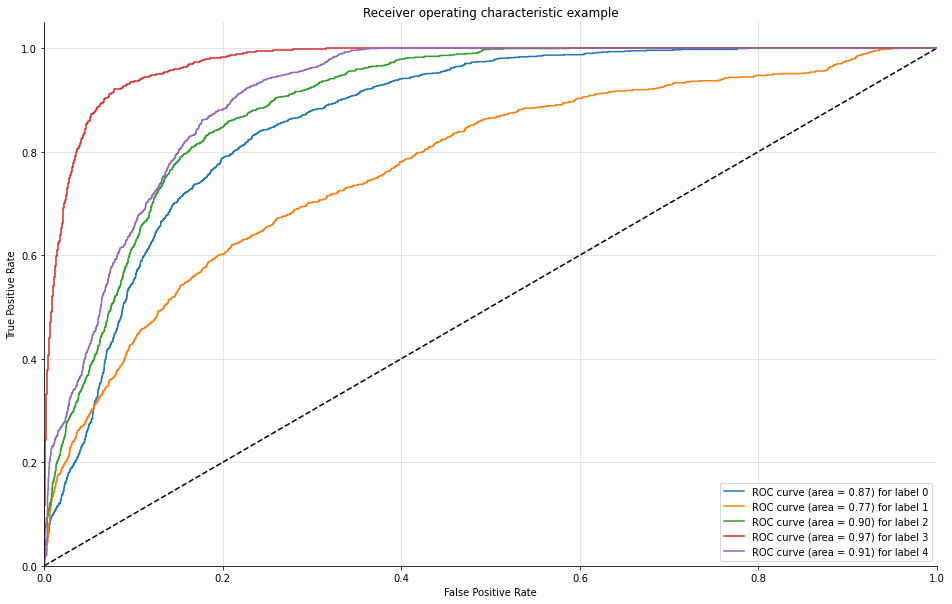

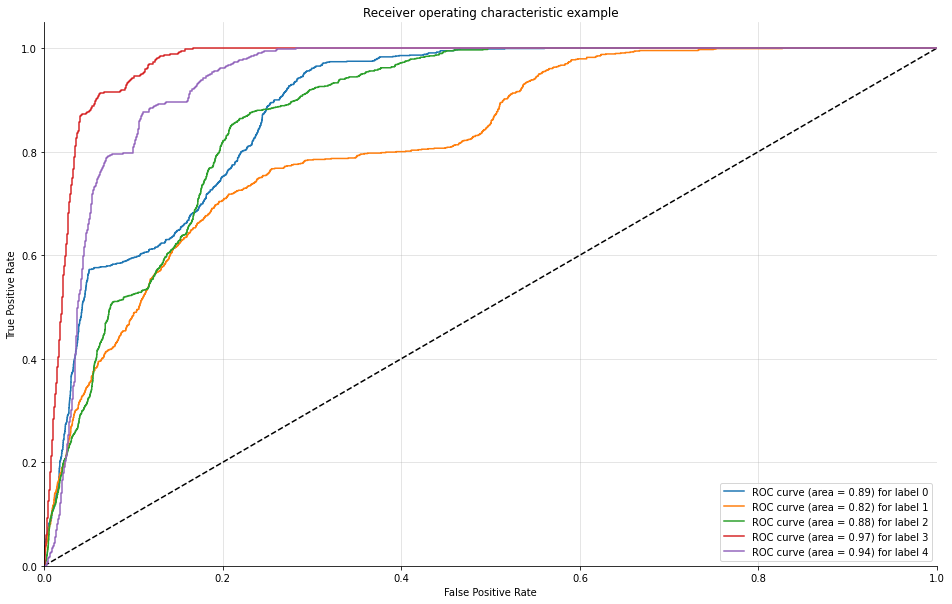

In [27]:
plot_multiclass_roc(ova_svc_clf, X_test, y_test, n_classes=5, figsize=(16, 10))
plot_multiclass_roc(ovo_svc_clf, X_test, y_test, n_classes=5, figsize=(16, 10))

# Desafío Kaggle - Desarrollo
*Objetivo: El problema propuesto consiste en predecir la categoría a la que pertenece un anunció a partir de su título*

In [28]:
def year_week(y, w):
    return datetime.strptime(f'{y} {w} 1', '%G %V %u')

In [29]:
X = pd.read_csv('x_train.csv')

X_dd_by_cities = {}
for k,v in X.groupby('Borough'):
    if k not in X_dd_by_cities:
        v.index = v.apply(lambda row: year_week(row.year, row.week), axis=1)
        v.drop(['Borough','year','week'], axis=1, inplace=True)
        v.sort_index(ascending=True, axis=0, inplace=True)
        X_dd_by_cities[k] = v

In [30]:
Y = pd.read_csv('y_train.csv')
years = []
weeks = []
borough = []
for ywb in Y['year_week_borough'].values:
    y,w,b = ywb.split('_')
    years.append(y)
    weeks.append(w)
    borough.append(b)
times_pd = pd.DataFrame({'year':years, 'week':weeks, 'Borough':borough})
Y = pd.concat([Y,times_pd], axis=1)
Y.drop(['year_week_borough'], axis=1, inplace=True)

Y_dd_by_cities = {}
for k,v in Y.groupby('Borough'):
    if k not in Y_dd_by_cities:
        v.index = v.apply(lambda row: year_week(row.year, row.week), axis=1)
        v.drop(['Borough','year','week'], axis=1, inplace=True)
        v.sort_index(ascending=True, axis=0, inplace=True)
        Y_dd_by_cities[k] = v

In [31]:
X_t = pd.read_csv('x_test.csv')
years = []
weeks = []
borough = []
for ywb in X_t['year_week_borough'].values:
    y,w,b = ywb.split('_')
    years.append(y)
    weeks.append(w)
    borough.append(b)
times_pd = pd.DataFrame({'year':years, 'week':weeks, 'Borough':borough})
X_t = pd.concat([times_pd,X_t], axis=1)
X_t.drop(['year_week_borough'], axis=1, inplace=True)

X_t_dd_by_cities = {}
for k,v in X_t.groupby('Borough'):
    if k not in X_t_dd_by_cities:
        v.index = v.apply(lambda row: year_week(row.year, row.week), axis=1)
        v.drop(['Borough','year','week'], axis=1, inplace=True)
        v.sort_index(ascending=True, axis=0, inplace=True)
        X_t_dd_by_cities[k] = v

In [32]:
#display(Y_dd_by_cities['Bronx'].head())
#display(X_dd_by_cities['Bronx'].head())
#display(X_t_dd_by_cities['Bronx'].head())

In [33]:
pipe_lr_1 = Pipeline([('scl', StandardScaler()),
                     ('reg', MultiOutputRegressor(estimator=LinearRegression(), n_jobs=-1))]) ## best

In [34]:
%%time
models_dd = {}
for bor in X_dd_by_cities.keys():
    models_dd[bor] = pipe_lr_1
    models_dd[bor].fit(X_dd_by_cities[bor], Y_dd_by_cities[bor])

CPU times: user 28 ms, sys: 4.18 ms, total: 32.2 ms
Wall time: 40.8 ms


In [35]:
preds_dd = {}
for bor in X_t_dd_by_cities.keys():
    preds_dd[bor] = pd.DataFrame(models_dd[bor].predict(X_t_dd_by_cities[bor]), columns=Y_dd_by_cities[bor].columns, index=X_t_dd_by_cities[bor].index)

In [36]:
df_test_patt = pd.read_csv('y_test_pattern.csv')['year_week_borough']

years = []
weeks = []
borough = []
for ywb in df_test_patt.values:
    y,w,b = ywb.split('_')
    years.append(y)
    weeks.append(w)
    borough.append(b)
times_pd = pd.DataFrame({'year':years, 'week':weeks, 'Borough':borough})

subm_dd_dates = {}
for y,w,b in times_pd.values:
    if b not in subm_dd_dates:
        subm_dd_dates[b] = []
    subm_dd_dates[b].append(year_week(y,w))
    
final_subm_df = pd.concat([preds_dd[k][preds_dd[k].index.isin(subm_dd_dates[k])] for k in preds_dd.keys()], axis=0, ignore_index=False)
df_test_patt.index = final_subm_df.index
final_subm_df['year_week_borough'] = df_test_patt

In [37]:
final_subm_df.to_csv('sub_submission.csv', index=False)